In [1]:
from data import create_train_val_loader
from options import utils
import yaml
import collections
import argparse
from matplotlib import pyplot as plt
import torch

/home/jfaath/anaconda3/envs/dlp/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
from options.opts import get_training_arguments

sys.argv = ['cvnets', '--common.config-file', 'config/classification/data_test.yaml']
opts = get_training_arguments()

In [4]:
train_loader, val_loader, train_sampler = create_train_val_loader(opts)

2022-04-13 11:55:01 - LOGS    - Training and validation dataset details: 
TinyImagenetDataset(
	root=/home/jfaath/projects/image_data/tiny-imagenet-200/train
	 is_training=True
	samples=100000
	transforms=Compose(
			RandomResizedCrop(scale=[0.08, 1.0], ratio=(0.9, 1.1), interpolation=bilinear), 
			RandomHorizontalFlip(p=0.5), 
			NumpyToTensor())
)
TinyImagenetDataset(
	root=/home/jfaath/projects/image_data/tiny-imagenet-200/val/images
	 is_training=False
	samples=10000
	transforms=Compose(
			Resize(size=72, interpolation=bilinear), 
			CenterCrop(size=(h=64, w=64)), 
			NumpyToTensor())
)
2022-04-13 11:55:01 - LOGS    - Training sampler details: 
BatchSampler(
 	 base_im_size=(h=64, w=64)
 	 base_batch_size=128
	
)
2022-04-13 11:55:01 - LOGS    - Validation sampler details: 
BatchSampler(
 	 base_im_size=(h=64, w=64)
 	 base_batch_size=100
	
)
2022-04-13 11:55:01 - LOGS    - Number of data workers: 4


(64, 64, 3)


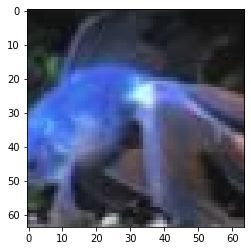

In [7]:
x = []
for batch_id, batch in enumerate(val_loader):
    img = batch['image'][0]
    img = torch.moveaxis(img, 0, 2).cpu().numpy()
    plt.imshow(img)
#     print(batch['label'])
#     x.append(max(batch['label']))
    
    break
print(img)

In [ ]:
import pickle
def open_test_data():
    return open('labels.pickle', 'rb')

with open_test_data() as f:
    dict1 = pickle.load(f)
    
len(dict1)

In [ ]:
from data.transforms.image import RandomResizedCrop
import cv2

img = cv2.imread("/home/jfaath/Downloads/sarek.jpeg")
data = {'image': img}

rrs = RandomResizedCrop(opts, (64, 64))
print(rrs.scale)
print(rrs.ratio)
new_img = rrs(data)['image']
plt.imshow(new_img)

In [ ]:
plt.imshow(img)

In [3]:
import torch
from cvnets import get_model

model = get_model(opts)

x = torch.randn(1, 3, 64, 64)

y = model(x)
print(y.shape)

torch.Size([1, 200])


In [4]:
import torch
from cvnets import get_model

model = get_model(opts)

x = torch.randn(2, 3, 256, 256)

y = model(x)
print(y.shape)

after conv_1: torch.Size([2, 16, 128, 128])
after layer_1: torch.Size([2, 32, 128, 128])
after layer_2: torch.Size([2, 48, 64, 64])
after layer_3: torch.Size([2, 64, 32, 32])
after layer_4: torch.Size([2, 80, 16, 16])
after layer_5: torch.Size([2, 96, 8, 8])
after conv_1x1_exp: torch.Size([2, 384, 8, 8])
torch.Size([2, 200])
